## HW1 

Implement the Gradient Based Methods (not covered in the lecture, to be discussed in the seminar; see below for the algorithm) in the four arm bernoulli bandit example (Lecture 1, Page 28). 

- Set the termination time to 1000
- Number of trials = 20
- Consider three choices of $\eta$, corresponding to 0.1, 1 and 10
- Plot the average reward and regret for each choice of $\eta$

![gradient_based](./graphs/gradient_based_lecture.png)

In [1]:
## your code here
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

bandit_probabilities = [0.10, 0.40, 0.10, 0.10]

number_of_bandits = len(bandit_probabilities) # = n_actions

action_space = np.arange(number_of_bandits) # =[0,1,2,3]

number_of_trials = 20 
timesteps = 1000

arms = np.zeros(timesteps, dtype=int)

def step(action):
    rand = np.random.random()  # [0.0,1.0)
    reward = 1.0 if (rand < bandit_probabilities[action]) else 0.0
    return reward

def compute_regret(bandit_probabilities, arms, time_steps):
    probs = [bandit_probabilities[arm] for arm in arms]
    return np.cumsum(np.ones(time_steps)) * np.amax(bandit_probabilities) - np.cumsum(probs)


def cumulative_average_mean(r, n):
    return np.cumsum(r) / np.cumsum(np.ones(n))


def plot_rewards(reward_list, n):
    for r in reward_list:
        plt.plot(cumulative_average_mean(r[0], n), linewidth=3)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    legend_str = [r[1] for r in reward_list]
    plt.legend(legend_str)
    plt.show()

def plot_regrets(regrets):
    for a in regrets:
        plt.plot(a[0], linewidth=3)
    plt.xlabel('Steps')
    plt.ylim(0.0,50.0)
    plt.ylabel('Regret')
    legend_str = [r[1] for r in regrets]
    plt.legend(legend_str)
    plt.show()



def gradient_bandit_policy(actions, pref_scores):
    sum_pref_scores = sum(np.exp(pref_scores[action]) for action in actions)
    pr = [np.exp(pref_scores[action]) / sum_pref_scores for action in actions]
    #return np.random.choice([action_ for action_, value_ in enumerate(pr) if value_ == np.max(pr)]), pr
    return np.random.choice(actions, p =pr), pr

def apply_gradient_bandit_policy(n_bandits, action_space, n_trials, timesteps, arms, gradient_constants):
    rewards = np.zeros((len(gradient_constants), n_trials, timesteps), dtype=float)
    regrets = np.zeros((len(gradient_constants), n_trials, timesteps), dtype=float)
    
    for gradient_constant_counter, gradient_constant in enumerate(gradient_constants):
        for trial in range(n_trials):
            H = np.zeros(n_bandits, dtype=float)
            mean_reward = 0
            
            for t in range(timesteps):
                
                action, pr = gradient_bandit_policy(action_space, H)
                
                r = step(action)
                
                prev_mean = mean_reward
                mean_reward = prev_mean + (rewards[gradient_constant_counter, trial, :][t] - prev_mean)/(t + 1)

                for a, value in enumerate(H):
                    if action == a:
                        H[a] = H[a] + gradient_constant * (r - mean_reward) * (1 - pr[a])
                    else:
                        H[a] = H[a] - gradient_constant * (r - mean_reward) * (pr[a])
                        
                rewards[gradient_constant_counter, trial, t] += r
                arms[t] = action
            
            
            regret = compute_regret(bandit_probabilities, arms, timesteps)
            regrets[gradient_constant_counter, trial, :] += regret
          


    # Mean of the reward at a given timestep "t" over all the trials
    rewards = np.mean(rewards, axis=1)
    regrets = np.mean(regrets, axis=1)

    rewards = list(rewards) 
    regrets = list(regrets)   
    
    legend_entries = ["Gradient $n=" + str(gradient_constant) + "$" for gradient_constant in gradient_constants] 

    rewards = list(zip(rewards, legend_entries))
    regrets = list(zip(regrets, legend_entries))

    return rewards,regrets
    

    
gradient_constants = [0.1, 1, 10]
rewards_gradient, regrets_gradient = apply_gradient_bandit_policy(number_of_bandits, action_space, number_of_trials, timesteps, arms, gradient_constants)

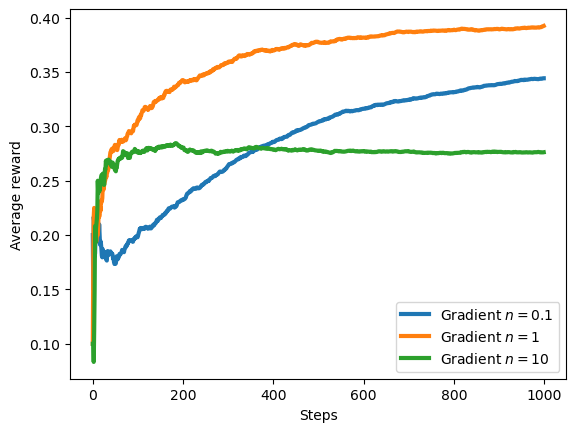

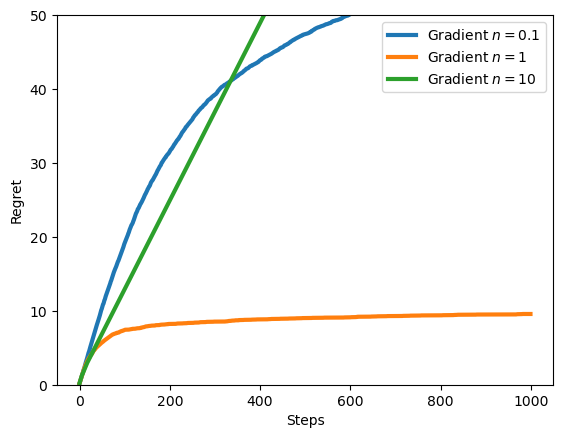

In [2]:
plot_rewards(rewards_gradient, timesteps)
plot_regrets(regrets_gradient)